We start with the prerequisites for the lab. It's always good to put this in at the beginning. 

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from tqdm import tqdm
import imageio

## Project Part 1 : Ising model

No numerical physics class would be complete without doing the Ising model. Howevr, because we want to be starte of the art on this. We are going to do the Ising model in way that is a little bit different than what you have done in the past. We are going to do the Ising model with Deep learning. The first part of this project will largely follow work done in this nature paper

https://arxiv.org/abs/1605.01735 

This captures much of the core ideas that we want in building simulators, and, of course highlights the basic scheme that we get in an Ising model. 

Our first step is to setup the Ising model....

Phil Adds some text about the Ising model

As a first step write (split the below code into multiple steps to build the concept and guide the the student)

In [2]:
def initialize(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            energy += -0.5*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    return energy

def flip(i,j,iArr,TM1):
    spin   = iArr[i,j]
    energy = 2*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)
    #if energy < 0:
    #    iArr[i,j] *= -1
    #elif rand() < np.exp(-1*energy*TM1):
    #    iArr[i,j] *= -1
    return

def update_sys(iArr,N,TM1):
    for i in range(N):
        for j in range(N):
            flip(i,j,iArr,TM1)
    return 

def update_rand(iArr,N,TM1):
    #ix = np.random.random_integers(N,size=(N))-1
    #iy = np.random.random_integers(N,size=(N))-1
    #ix = np.random.randint(N,size=(N))
    #iy = np.random.randint(N,size=(N))
    #for i in ix:
    #    for j in iy:
    #        flip(i,j,iArr,TM1)
    ir = np.random.random_integers(N*N,size=(N*N))-1
    for ind in ir:
        i = ind//N
        j = ind % N
        flip(i,j,iArr,TM1)
    return 

def update_rand_par(iArr,N,TM1):
    ir = np.random.random_integers(N*N,size=(N*N))-1
    #print(ir//N)
    #print(ir%N)
    #print(iArr[ir//N,ir%N])
    flip(ir//N,ir%N,iArr,TM1)
    return 

def mag(iArr):
    return np.sum(iArr)
    
def evolve(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            energy += 2*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    return energy
    
def mapPlot(ax,fig, iArr, i, N, images):
    plt.cla()
    X, Y = np.meshgrid(range(N), range(N))
    #plt.setp(sp.get_yticklabels(), visible=False)
    #plt.setp(sp.get_xticklabels(), visible=False)      
    ax.pcolormesh(X, Y, iArr, cmap=plt.cm.RdBu);
    ax.text(0.6, 0.3,'Time=%d'%i,fontdict={'size': 24, 'color':  'red'})#; plt.axis('tight')    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image  = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

Now, our next step is to run an ising model simulation. We will scan across a variety of tempature points, and we will observe the phase transition

....now Phil will write some step-by-stpe stuff

Loading...:   0%|                                                                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1
Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:11<00:00,  2.71it/s]


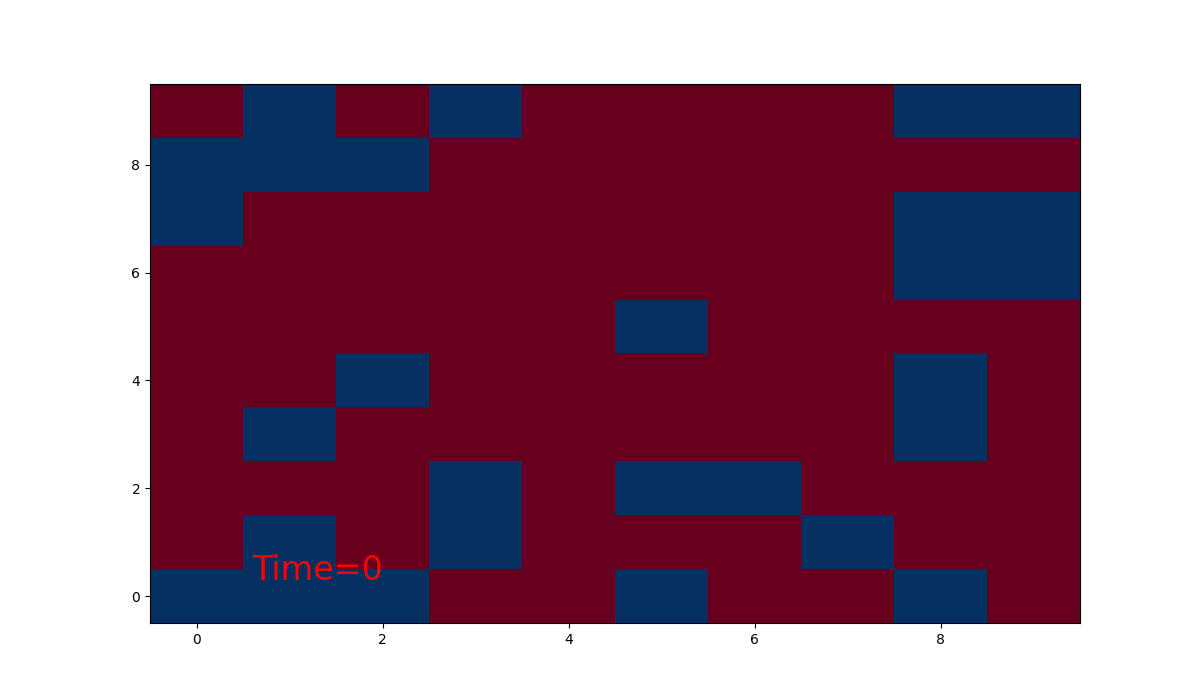

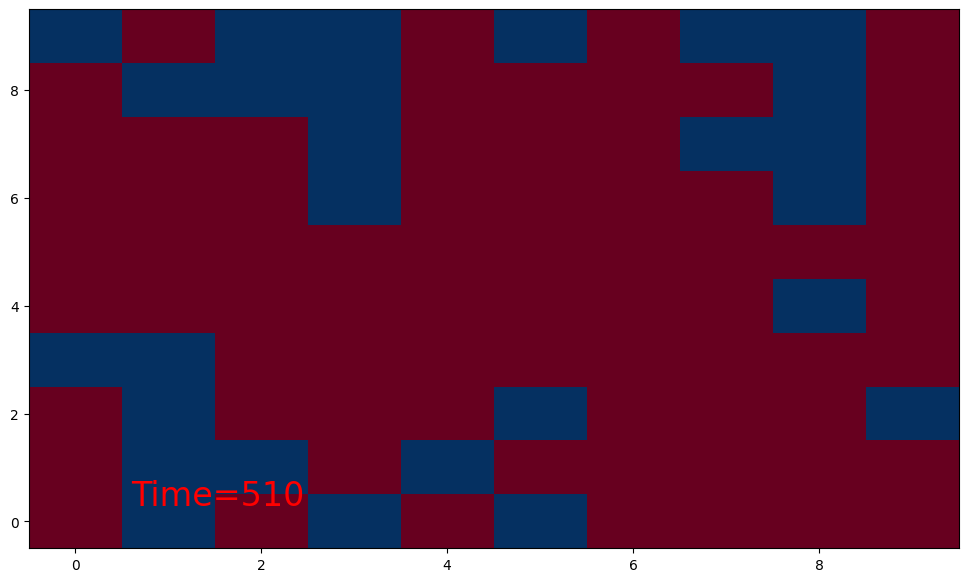

In [3]:
from IPython.display import Image
nt = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**9       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

images = []
fig, ax = plt.subplots(figsize=(12,7))
for temp in tqdm (range (nt), desc="Loading..."):
    pArr = initialize(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    pTM1=1.0/T[temp]; pTM2=pTM1**2;
    
    for i in range(eqSteps):         # equilibrate
        update_rand_par(pArr, N, pTM1)           # Monte Carlo moves
        #if i % 5 == 0 and temp == 5: 
        #    mapPlot(ax,fig,pArr,i,N,images)
        
    for i in range(mcSteps):
        update_rand_par(pArr, N, pTM1)           
        Ene = hamiltonian(pArr, N)     # calculate the energy
        Mag = mag(pArr)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        if i % 5 == 0 and temp == 16: 
            mapPlot(ax,fig,pArr,i,N,images)
        
    # divide by number of sites and iteractions to obtain intensive values    
    E[temp] = n1*E1
    M[temp] = n1*M1
    C[temp] = (n1*E2 - n2*E1*E1)*pTM2
    X[temp] = (n1*M2 - n2*M1*M1)*pTM1

imageio.mimsave('./test.gif', images, fps=10)
Image(open('test.gif','rb').read())

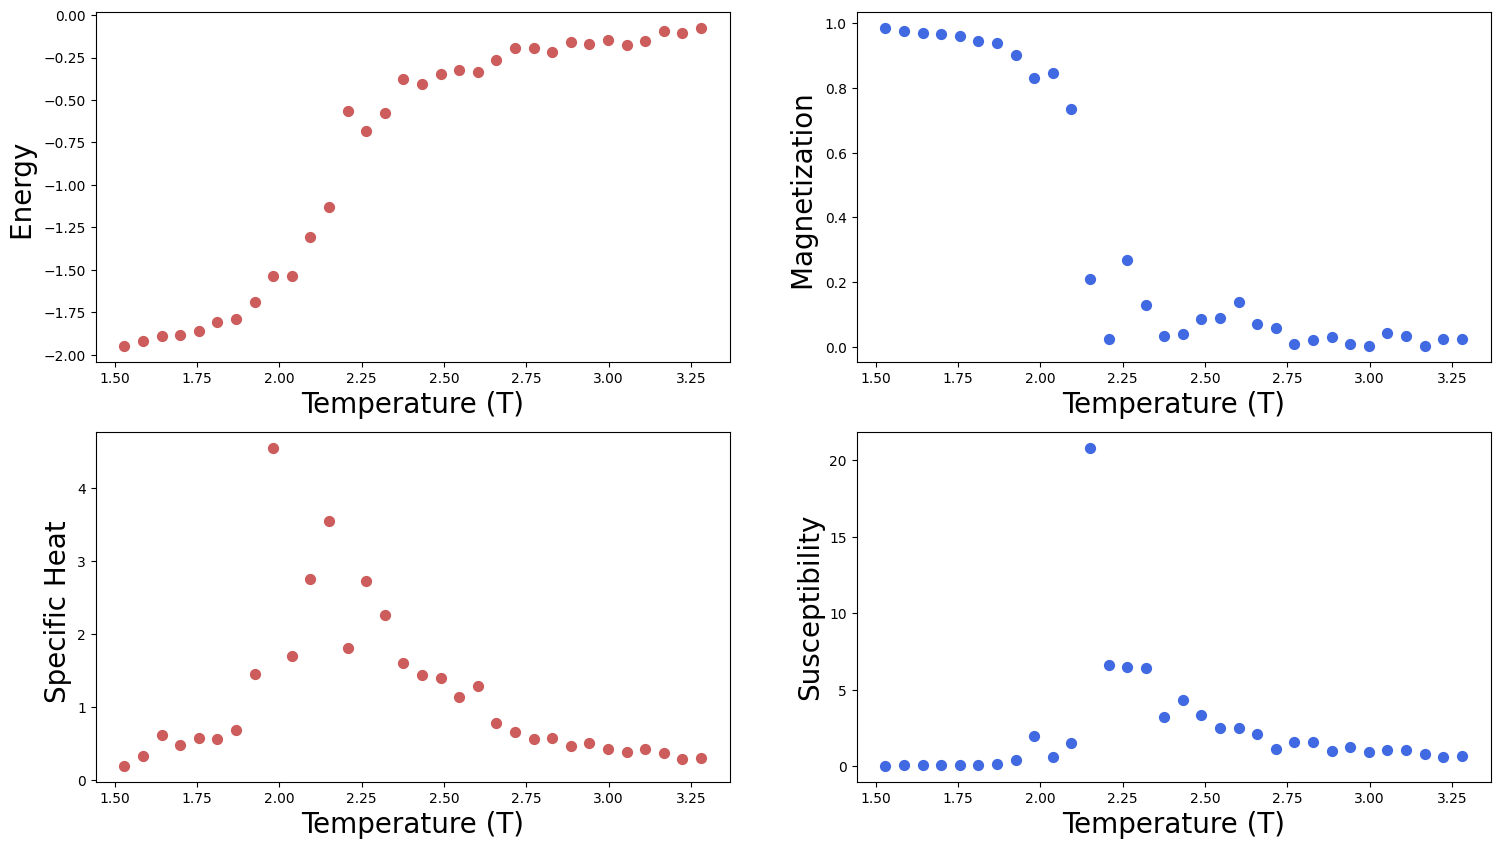

In [4]:
f = plt.figure(figsize=(18, 10)); #  

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');



Now, Phil write ssome stuff about how we want to make this a more sophsiticated piece of code, and suggest that we make a class.

The goal of this class is to be able to randomly generate Ising MC events, so that we can do a very precise scan. of the Ising model, and also so that we can save our configurations, to generate a deep learning regression to repeat this work on a new ising dataset. 

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 4096 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


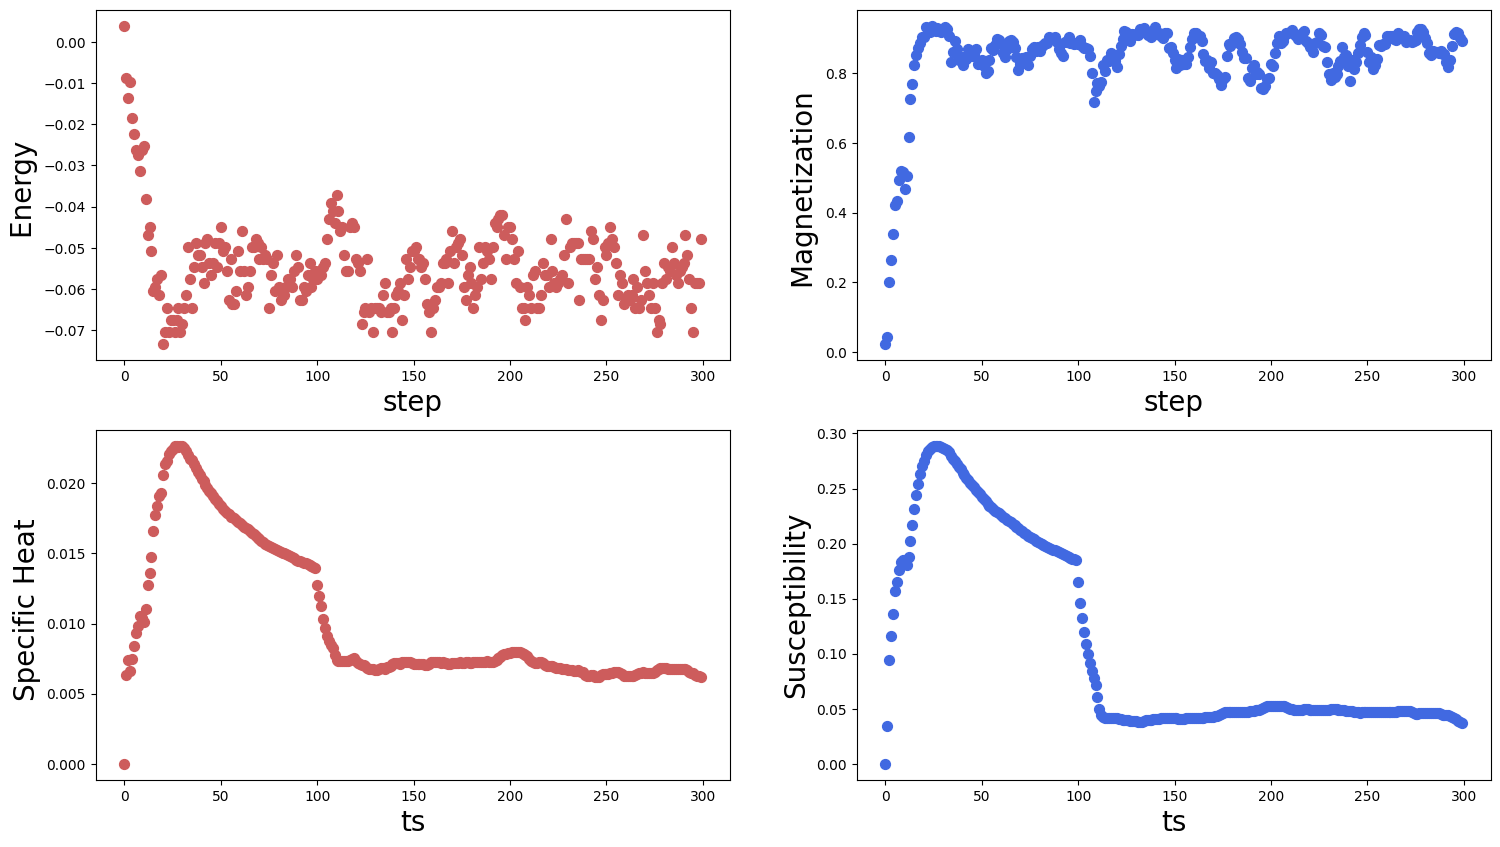

In [19]:
import h5py 

class Ising():
    
    def __init__(self, iN, Temp):
        self.N   = iN
        self.T   = Temp
        self.arr = self.initialize()
        self.steps = 300
        self.E   = np.array([])
        self.M   = np.array([])
        self.C   = np.array([])
        self.X   = np.array([])
        self.nsim = 1000
        
    def initialize(self):   
        state = 2*np.random.randint(2, size=(self.N,self.N))-1
        return state
    
    def simulate(self):
        self.images=[]
        N2M1 = 1./self.N/self.N
        TM1  = 1./self.T
        #fig, ax = plt.subplots(figsize=(12,7))
        #fig  = plt.figure(figsize=(15, 15), dpi=80);   
        #self.configPlot(fig, self.arr, 0, 1);
        for i in range(self.steps):
            update_rand_par(self.arr, self.N, TM1)           
            Ene = hamiltonian(self.arr, N)
            Mag = mag(self.arr)
            self.E   = np.append(self.E,Ene*N2M1)
            self.M   = np.append(self.M,Mag*N2M1)
            pC  = np.std(self.E[-100:])
            pX  = np.std(self.M[-100:])
            self.C   = np.append(self.C,pC)
            self.X   = np.append(self.X,pX)
            #if i % 5 == 0 and temp == 16: 
            #    mapPlot(ax,fig,pArr,i,N,self.images)
            #if i == 1:       self.configPlot(fig, self.arr, i, 2);
            #if i == 4:       self.configPlot(fig, self.arr, i, 3);
            #if i == 32:      self.configPlot(fig, self.arr, i, 4);
            #if i == 100:     self.configPlot(fig, self.arr, i, 5);
            #if i == 1000:    self.configPlot(fig, self.arr, i, 6);

    def simulate_save(self,pre=''):
        h5f  = h5py.File((pre)+'data_'+str(self.T)+'.h5', 'a')
        data = np.array([])#np.empty((1,self.N,self.N), int)
        mags = np.array([])
        TM1  = 1./self.T
        for n in range(self.nsim):
            if n % 25 == 0:
                print("sim",n)
            self.initialize()
            for i in range(self.steps):
                update_rand_par(self.arr, self.N, TM1)  
            pMag = mag(self.arr)
            data = np.append(self.arr,data)
            mags  = np.append(pMag,mags)
        data = np.reshape(data,(self.nsim,self.N,self.N))
        print(data.shape)
        h5f.create_dataset('data', data=data)
        h5f.create_dataset('mag' , data=mags)
        h5f.close()
            
    def configPlot(self, f, config, i, n_):
        X, Y = np.meshgrid(range(self.N), range(self.N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()
        
    def lastAvg(self):
        avgE = np.mean(self.E[500:-1])
        avgM = np.mean(self.M[500:-1])
        avgC = np.std(self.E[500:-1])
        avgX = np.std(self.M[500:-1])
        return avgE,avgM,avgC,avgX
        
    def plotEvol(self):
        ts = range(len(self.E))
        f = plt.figure(figsize=(18, 10)); #  
        sp =  f.add_subplot(2, 2, 1 );
        plt.scatter(ts, self.E, s=50, marker='o', color='IndianRed')
        plt.xlabel("step", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f.add_subplot(2, 2, 2 );
        plt.scatter(ts, abs(self.M), s=50, marker='o', color='RoyalBlue')
        plt.xlabel("step", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f.add_subplot(2, 2, 3 );
        plt.scatter(ts, self.C, s=50, marker='o', color='IndianRed')
        plt.xlabel("ts", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f.add_subplot(2, 2, 4 );
        plt.scatter(ts, self.X, s=50, marker='o', color='RoyalBlue')
        plt.xlabel("ts", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        
test = Ising(64,3.4)
test.simulate()
test.plotEvol()

Now before, we go into the full generate of events, we do some exploratoin of other more optimzied code with the aim of running this many times. 

In [6]:
#Now lets define the trignular ising 
def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            shift  = (j-1) % 2 
            energy += -0.5*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    return energy

def flip(i,j,iArr,TM1):
    spin   = iArr[i,j]
    shift  = (j-1) % 2 
    energy = 2*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j] + iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N]  + iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)


#test = Ising(64,3.0)
#test.simulate()

T       = np.linspace(1.53, 5.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
for temp in tqdm (range (nt), desc="Loading..."):
    test = Ising(64,T[temp])
    test.simulate()
    E[temp],M[temp],C[temp],X[temp]=test.lastAvg()

Loading...:   0%|                                                                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 4096 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Now plot the above parameters in detail, compute the uncertainty on the energy and magnetizatoin. 

In [9]:
T       = np.linspace(1.53, 5.28, nt); 
for temp in tqdm (range (nt), desc="Loading..."):
    test = Ising(32,T[temp])
    test.nsim=10
    test.simulate_save()
    
f = h5py.File('data_1.53.h5', 'r') 
list(f.keys())
f['data'].shape

Loading...:   0%|                                                                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 1024 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


sim 0


Loading...:   3%|██████▎                                                                                                                                                                                                   | 1/32 [00:00<00:28,  1.07it/s]

(10, 32, 32)
sim 0


Loading...:   6%|████████████▋                                                                                                                                                                                             | 2/32 [00:01<00:26,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:   9%|██████████████████▉                                                                                                                                                                                       | 3/32 [00:02<00:25,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  12%|█████████████████████████▎                                                                                                                                                                                | 4/32 [00:03<00:24,  1.15it/s]

(10, 32, 32)
sim 0


Loading...:  16%|███████████████████████████████▌                                                                                                                                                                          | 5/32 [00:04<00:23,  1.15it/s]

(10, 32, 32)
sim 0


Loading...:  19%|█████████████████████████████████████▉                                                                                                                                                                    | 6/32 [00:05<00:22,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  22%|████████████████████████████████████████████▏                                                                                                                                                             | 7/32 [00:06<00:21,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 8/32 [00:07<00:21,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  28%|████████████████████████████████████████████████████████▊                                                                                                                                                 | 9/32 [00:07<00:20,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  31%|██████████████████████████████████████████████████████████████▊                                                                                                                                          | 10/32 [00:08<00:19,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  34%|█████████████████████████████████████████████████████████████████████                                                                                                                                    | 11/32 [00:09<00:18,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  38%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                             | 12/32 [00:10<00:17,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  41%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 13/32 [00:11<00:16,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  44%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 14/32 [00:12<00:15,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  47%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 15/32 [00:13<00:15,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 16/32 [00:14<00:14,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 17/32 [00:14<00:13,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 18/32 [00:15<00:12,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 19/32 [00:16<00:11,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 20/32 [00:17<00:10,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 21/32 [00:18<00:09,  1.16it/s]

(10, 32, 32)
sim 0


Loading...:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 22/32 [00:19<00:08,  1.16it/s]

(10, 32, 32)
sim 0


Loading...:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 23/32 [00:20<00:07,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 24/32 [00:20<00:06,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 25/32 [00:21<00:05,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 26/32 [00:22<00:05,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 27/32 [00:23<00:04,  1.16it/s]

(10, 32, 32)
sim 0


Loading...:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 28/32 [00:24<00:03,  1.16it/s]

(10, 32, 32)
sim 0


Loading...:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 29/32 [00:25<00:02,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 30/32 [00:26<00:01,  1.17it/s]

(10, 32, 32)
sim 0


Loading...:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 31/32 [00:26<00:00,  1.17it/s]

(10, 32, 32)
sim 0


Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:27<00:00,  1.15it/s]

(10, 32, 32)


(10, 32, 32)

Ok, now, Phil needs to explain the above well. What we are going to do is build a neural network that will take the inputs and compute the magnetized state. 

What you want to do now is train a neural network to determine if the input state will magnetize or not. Our labels are going to be above and below. 

Loading...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 333.32it/s]


Epoch: 0 LOSS train: 0.41490229964256287 
Epoch: 1 LOSS train: 0.43230074644088745 
Epoch: 2 LOSS train: 0.43335479497909546 
Epoch: 3 LOSS train: 0.4339487850666046 
Epoch: 4 LOSS train: 0.430019348859787 
Epoch: 5 LOSS train: 0.4319840669631958 
Epoch: 6 LOSS train: 0.43394872546195984 
Epoch: 7 LOSS train: 0.4339487552642822 
Epoch: 8 LOSS train: 0.431984007358551 
Epoch: 9 LOSS train: 0.431984007358551 
Epoch: 10 LOSS train: 0.431984007358551 
Epoch: 11 LOSS train: 0.4300193190574646 
Epoch: 12 LOSS train: 0.431984007358551 
Epoch: 13 LOSS train: 0.43394869565963745 
Epoch: 14 LOSS train: 0.4319840669631958 
Epoch: 15 LOSS train: 0.431984007358551 
Epoch: 16 LOSS train: 0.42608991265296936 
Epoch: 17 LOSS train: 0.4300193786621094 
Epoch: 18 LOSS train: 0.43394869565963745 
Epoch: 19 LOSS train: 0.430019348859787 
[1.53       1.65096774 1.77193548 1.89290323 2.01387097 2.13483871
 2.25580645 2.37677419 2.49774194 2.61870968 2.73967742 2.86064516
 2.9816129  3.10258065 3.22354839 3.

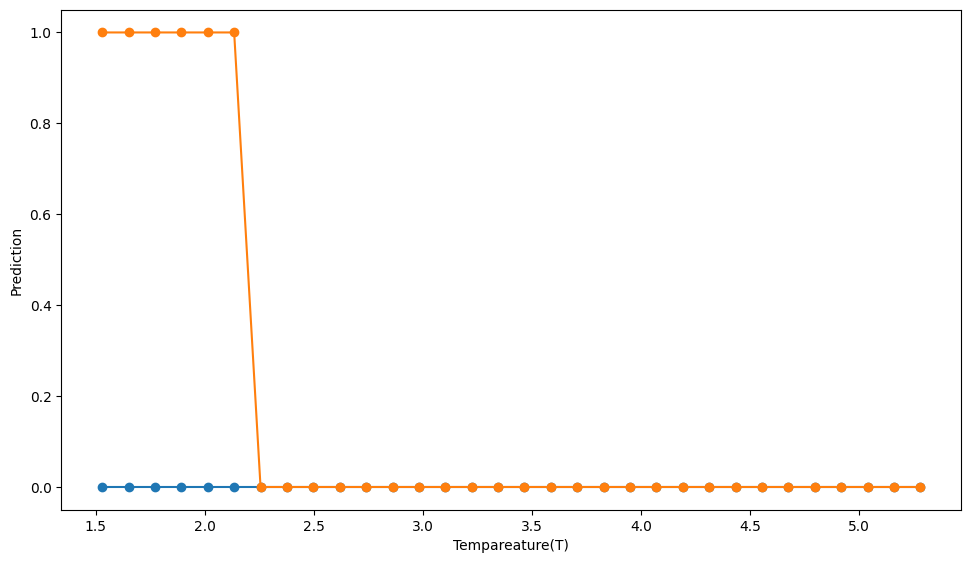

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics import Accuracy
from torch.utils.data import Sampler, BatchSampler, Dataset, DataLoader, Subset, SubsetRandomSampler, random_split

class DataSet(Dataset):
    def __init__(self, samples, labels, temps):
        super(DataSet, self).__init__()
        self.labels  = labels
        self.samples = samples
        self.temps   = temps
        if len(samples) != len(labels):
            raise ValueError(
                f"should have the same number of samples({len(samples)}) as there are labels({len(labels)})")
            
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        y = self.labels[index]
        x = self.samples[index]
        t = self.temps[index]
        return x, y, t

class DataSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.batch_size     = batch_size
        self.dataset_length = len(dataset)
        self.n_batches      = self.dataset_length / self.batch_size
        self.batch_ids      = torch.randperm(int(self.n_batches))

    def __len__(self):
        return self.batch_size

    def __iter__(self):
        for id in self.batch_ids:
            idx1 = torch.arange(id * self.batch_size, (id + 1) * self.batch_size)
            for index in idx1:
                yield int(index)

        if int(self.n_batches) < self.n_batches:
            idx1 = torch.arange(int(self.n_batches) * self.batch_size, self.dataset_length)
            for index in idx1:
                yield int(index)

class simple_MLP_4layer(torch.nn.Module):
    def __init__(self,input_size,out_channels=1,act_out=False,nhidden=64,batchnorm=False):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, out_channels),
        )
        self.output  = torch.nn.Sigmoid()
        self.act_out = act_out

    def forward(self, x):
        x = self.model(x)
        if self.act_out:
            x = self.output(x)
        return x

                
                
nones = 0
all_data  = None
all_temps = None
for temp in tqdm (range (nt), desc="Loading..."):
    f = h5py.File('data_'+str(T[temp])+'.h5', 'r')
    if temp == 0:
        all_data  = f['data']
        all_temps = np.ones(all_data.shape[0])*temp
    else:
        all_data  = np.append(all_data, f['data'],axis=0)
        all_temps = np.append(all_temps,np.ones(f['data'].shape[0])*temp)
    if T[temp] < 2.25:
        nones = all_data.shape[0]
    
all_data  = np.reshape(all_data,(all_data.shape[0],all_data.shape[1]*all_data.shape[2]))
all_labels=np.append(np.ones(nones),np.zeros(all_data.shape[0]-nones)).astype("float32")
all_dataset = DataSet(samples=all_data.astype("float32"),labels=all_labels,temps=all_temps)
ntotal = all_data.shape[0]
data_train, data_test = random_split(all_dataset, [int(0.8*ntotal),ntotal-int(0.8*ntotal)])
batch=10
train_loader = DataLoader(data_train, batch_size=batch,shuffle=True)

n_epochs=20
model     = simple_MLP_4layer(all_data.shape[1],out_channels=1,act_out=True) 
opt       = torch.optim.Adam(model.parameters(),lr=0.005)
criterion = nn.CrossEntropyLoss()
for epoch in range(n_epochs):
    model.train(True)
    running_loss = 0.0; updates=0
    for x, y, t in train_loader:
        opt.zero_grad()
        y_hat = model(x)
        loss  = criterion(y_hat.flatten(),y) 
        loss.backward()
        opt.step()
        running_loss += loss
        updates +=1
        del x,y
    print('Epoch: {} LOSS train: {} '.format(epoch,running_loss/(updates*batch)))

model.train(False)
test_accuracy = Accuracy(task="multiclass", num_classes=2)
tplot  = np.array([])
yplot  = np.zeros(len(T))
ytrue  = np.zeros(len(T))
ycount = np.zeros(len(T))
for x, y, t in train_loader:
    with torch.no_grad():
        y_hat = model(x)
        #tplot = np.append(tplot,t)
        for pT,py_hat,py in zip(t.detach().numpy(),y_hat.detach().numpy(),y.detach().numpy()):
            pT = int(pT)
            yplot[pT]  += py_hat[0]
            ytrue[pT]  += py
            ycount[pT] += 1
yplot/=ycount
ytrue/=ycount
f = plt.figure(figsize=(9, 5));
f.add_axes([0,0,1,1])#matplotlib.pyplot.figure()
print(T,yplot,ytrue)
plt.plot(T,yplot, marker='o')
plt.plot(T,ytrue, marker='o')
plt.ylabel('Prediction')
plt.xlabel('Tempareature(T)')
plt.show()
    

Once we see that training and testing match, particularly in the critical region, we can now apply this to a different Ising model, to see if we have learned the phase transition in that model. 

Phil proceeds to describe the Ising Hamiltonian

In [16]:
#Now lets define the trignular ising 
def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            shift  = (j-1) % 2 
            energy += -0.5*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    return energy

def flip(i,j,iArr,TM1):
    spin   = iArr[i,j]
    shift  = (j-1) % 2 
    energy = 2*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j] + iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N]  + iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)


#test = Ising(64,3.0)
#test.simulate()

T       = np.linspace(1.53, 5.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
for temp in tqdm (range (nt), desc="Loading..."):
    test = Ising(64,T[temp])
    test.simulate()
    E[temp],M[temp],C[temp],X[temp]=test.lastAvg()

Loading...:   0%|                                                                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 4096 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/philipharris/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

In [20]:
T       = np.linspace(1.53, 5.28, nt); 
for temp in tqdm (range (nt), desc="Loading..."):
    test = Ising(32,T[temp])
    test.nsim=10
    test.simulate_save('tri')

Loading...:   0%|                                                                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/224019710.py:48: DeprecationWarning: This function is deprecated. Please call randint(1, 1024 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


sim 0


Loading...:   3%|██████▎                                                                                                                                                                                                   | 1/32 [00:00<00:28,  1.09it/s]

(10, 32, 32)
sim 0


Loading...:   6%|████████████▋                                                                                                                                                                                             | 2/32 [00:01<00:27,  1.08it/s]

(10, 32, 32)
sim 0


Loading...:   9%|██████████████████▉                                                                                                                                                                                       | 3/32 [00:02<00:27,  1.05it/s]

(10, 32, 32)
sim 0


Loading...:  12%|█████████████████████████▎                                                                                                                                                                                | 4/32 [00:03<00:26,  1.06it/s]

(10, 32, 32)
sim 0


Loading...:  16%|███████████████████████████████▌                                                                                                                                                                          | 5/32 [00:04<00:24,  1.08it/s]

(10, 32, 32)
sim 0


Loading...:  19%|█████████████████████████████████████▉                                                                                                                                                                    | 6/32 [00:05<00:23,  1.10it/s]

(10, 32, 32)
sim 0


Loading...:  22%|████████████████████████████████████████████▏                                                                                                                                                             | 7/32 [00:06<00:22,  1.11it/s]

(10, 32, 32)
sim 0


Loading...:  25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 8/32 [00:07<00:21,  1.12it/s]

(10, 32, 32)
sim 0


Loading...:  28%|████████████████████████████████████████████████████████▊                                                                                                                                                 | 9/32 [00:08<00:20,  1.12it/s]

(10, 32, 32)
sim 0


Loading...:  31%|██████████████████████████████████████████████████████████████▊                                                                                                                                          | 10/32 [00:09<00:19,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  34%|█████████████████████████████████████████████████████████████████████                                                                                                                                    | 11/32 [00:09<00:18,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  38%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                             | 12/32 [00:10<00:17,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  41%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 13/32 [00:11<00:16,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  44%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 14/32 [00:12<00:15,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  47%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 15/32 [00:13<00:14,  1.15it/s]

(10, 32, 32)
sim 0


Loading...:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 16/32 [00:14<00:14,  1.14it/s]

(10, 32, 32)
sim 0


Loading...:  53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 17/32 [00:15<00:13,  1.13it/s]

(10, 32, 32)
sim 0


Loading...:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 18/32 [00:16<00:12,  1.10it/s]

(10, 32, 32)
sim 0


Loading...:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 19/32 [00:17<00:11,  1.09it/s]

(10, 32, 32)
sim 0


Loading...:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 20/32 [00:18<00:10,  1.10it/s]

(10, 32, 32)
sim 0


Loading...:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 21/32 [00:18<00:10,  1.10it/s]

(10, 32, 32)
sim 0


Loading...:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 22/32 [00:19<00:09,  1.10it/s]

(10, 32, 32)
sim 0


Loading...:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 23/32 [00:20<00:08,  1.09it/s]

(10, 32, 32)
sim 0


Loading...:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 24/32 [00:21<00:07,  1.09it/s]

(10, 32, 32)
sim 0


Loading...:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 25/32 [00:22<00:06,  1.09it/s]

(10, 32, 32)
sim 0


Loading...:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 26/32 [00:23<00:05,  1.07it/s]

(10, 32, 32)
sim 0


Loading...:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 27/32 [00:24<00:04,  1.06it/s]

(10, 32, 32)
sim 0


Loading...:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 28/32 [00:25<00:03,  1.04it/s]

(10, 32, 32)
sim 0


Loading...:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 29/32 [00:26<00:02,  1.02it/s]

(10, 32, 32)
sim 0


Loading...:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 30/32 [00:27<00:01,  1.03it/s]

(10, 32, 32)
sim 0


Loading...:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 31/32 [00:28<00:00,  1.04it/s]

(10, 32, 32)
sim 0


Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:29<00:00,  1.09it/s]

(10, 32, 32)


Finally, run the neural entwork on a dataset for triangular Ising models. Show that you can predict the correct tempearture, what is it? 

Loading...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 434.63it/s]
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/581766360.py:42: RuntimeWarning: invalid value encountered in divide
  yplot/=ycount
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_4177/581766360.py:43: RuntimeWarning: invalid value encountered in divide
  ytrue/=ycount


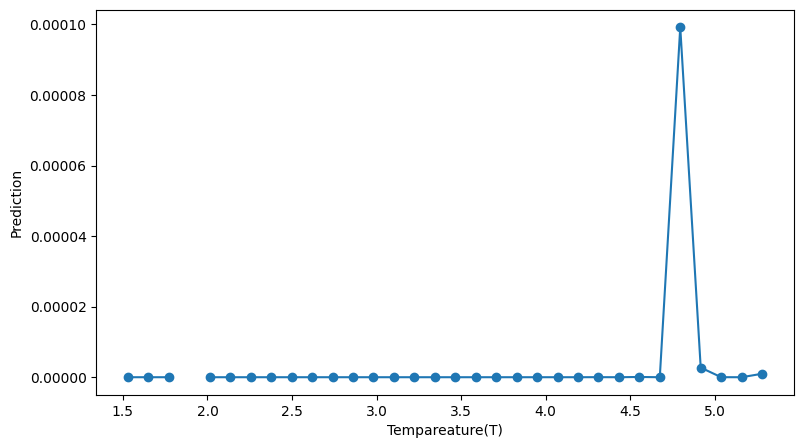

In [21]:
#Now lets test it on something different
def load():
    nones = 0
    all_tri_data  = None
    all_tri_temps = None
    for temp in tqdm (range (nt), desc="Loading..."):
        f = h5py.File('tridata_'+str(T[temp])+'.h5', 'r')
        if temp == 0:
            all_tri_data  = f['data']
            all_tri_temps = np.ones(all_tri_data.shape[0])*temp
        else:
            all_tri_data  = np.append(all_tri_data, f['data'],axis=0)
            all_tri_temps = np.append(all_tri_temps,np.ones(f['data'].shape[0])*temp)
    if T[temp] < 2.25:
        nones = all_data.shape[0]
        
    
    all_tri_data  = np.reshape(all_tri_data,(all_tri_data.shape[0],all_tri_data.shape[1]*all_tri_data.shape[2]))
    all_tri_labels=np.append(np.ones(nones),np.zeros(all_tri_data.shape[0]-nones)).astype("float32")
    all_tri_dataset = DataSet(samples=all_tri_data.astype("float32"),labels=all_tri_labels,temps=all_tri_temps)
    ntotal = all_tri_data.shape[0]
    data_tri_train, data_tri_test = random_split(all_tri_dataset, [int(0.8*ntotal),ntotal-int(0.8*ntotal)])
    return data_tri_train, data_tri_test

data_tri_train, data_tri_test = load()
batch=1000
test_tri_loader = DataLoader(data_tri_test, batch_size=batch,shuffle=True)

model.train(False)
tplot  = np.array([])
yplot  = np.zeros(len(T))
ytrue  = np.zeros(len(T))
ycount = np.zeros(len(T))
for x, y, t in test_tri_loader:
    with torch.no_grad():
        y_hat = model(x)
        for pT,py_hat,py in zip(t.detach().numpy(),y_hat.detach().numpy(),y.detach().numpy()):
            pT = int(pT)
            yplot[pT]  += py_hat[0]
            ytrue[pT]  += py
            ycount[pT] += 1
yplot/=ycount
ytrue/=ycount

f = plt.figure(figsize=(9, 5));
plt.plot(T,yplot, marker='o')
plt.ylabel('Prediction')
plt.xlabel('Tempareature(T)')
plt.show()
    

Talk about percolation thery and list the true formula for the Ising model. 

## Part 2 Lattice QCD

What I have here is just a copy and paste of the summer school workshop, pretty much. Also, feel free to adjust as you see fit. 

In [49]:
def torch_mod(x):
    return torch.remainder(x, 2*np.pi)
def torch_wrap(x):
    return torch_mod(x+np.pi) - np.pi
def grab(var):
    return var.detach().cpu().numpy()

def print_metrics(history, avg_last_N_epochs):
  print(f'== Era {era} | Epoch {epoch} metrics ==')
  for key, val in history.items():
      avgd = np.mean(val[-avg_last_N_epochs:])
      print(f'\t{key} {avgd:g}')
        
def init_live_plot(dpi=125, figsize=(8,4)):
    fig, ax_ess = plt.subplots(1,1, dpi=dpi, figsize=figsize)
    plt.xlim(0, N_era*N_epoch)
    plt.ylim(0, 1)
    ess_line = plt.plot([0],[0], alpha=0.5) # dummy
    plt.grid(False)
    plt.ylabel('ESS')
    ax_loss = ax_ess.twinx()
    loss_line = plt.plot([0],[0], alpha=0.5, c='orange') # dummy
    plt.grid(False)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    display_id = display(fig, display_id=True)
    return dict(
        fig=fig, ax_ess=ax_ess, ax_loss=ax_loss,
        ess_line=ess_line, loss_line=loss_line,
        display_id=display_id
    )

def moving_average(x, window=10):
    if len(x) < window:
       return np.mean(x, keepdims=True)
    else:
       return np.convolve(x, np.ones(window), 'valid') / window

def update_plots(history, fig, ax_ess, ax_loss, ess_line, loss_line, display_id):
    Y = np.array(history['ess'])
    Y = moving_average(Y, window=15)
    ess_line[0].set_ydata(Y)
    ess_line[0].set_xdata(np.arange(len(Y)))
    Y = history['loss']
    Y = moving_average(Y, window=15)
    loss_line[0].set_ydata(np.array(Y))
    loss_line[0].set_xdata(np.arange(len(Y)))
    ax_loss.relim()
    ax_loss.autoscale_view()
    fig.canvas.draw()
    display_id.update(fig) # need to force colab to update plot

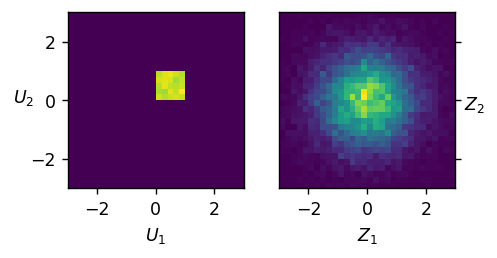

In [26]:
batch_size = 2**14
u = np.random.random(size=(batch_size, 2))
z = np.sqrt(-2*np.log(u[:,0]))[:,np.newaxis] * np.stack(
      (np.cos(2*np.pi*u[:,1]), np.sin(2*np.pi*u[:,1])), axis=-1)
fig, ax = plt.subplots(1,2, dpi=125, figsize=(4,2))
for a in ax:
    a.set_xticks([-2, 0, 2])
    a.set_yticks([-2, 0, 2])
    a.set_aspect('equal')
ax[0].hist2d(u[:,0], u[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[0].set_xlabel(r"$U_1$")
ax[0].set_ylabel(r"$U_2$", rotation=0, y=.46)
ax[1].hist2d(z[:,0], z[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r"$Z_1$")
ax[1].set_ylabel(r"$Z_2$", rotation=0, y=.53)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
plt.show()

### Exercise Make a CNN with x,y,z properties

In [36]:
def make_conv_net(*, hidden_sizes, kernel_size, in_channels, out_channels):
    sizes = [in_channels] + hidden_sizes + [out_channels]
    #assert packaging.version.parse(torch.__version__) >= packaging.version.parse('1.5.0')
    assert kernel_size % 2 == 1, 'kernel size must be odd for PyTorch >= 1.5.0'
    padding_size = (kernel_size // 2)
    net = []
    for i in range(len(sizes) - 1):
        net.append(torch.nn.Conv2d(
            sizes[i], sizes[i+1], kernel_size, padding=padding_size,
            stride=1, padding_mode='circular'))
        if i != len(sizes) - 2:
            net.append(torch.nn.LeakyReLU())
        else:
            net.append(torch.nn.Tanh())
    return torch.nn.Sequential(*net)

# Scalar field theory on the lattice


We'll use the Euclidean lattice action,
\begin{equation}
\begin{split}
S^E_{\text{latt}}(\phi) &= \sum_{\vec{n}} \phi(\vec{n}) \left[ \sum_{\mu \in \{1,2\}} 2\phi(\vec{n}) - \phi(\vec{n}+\hat{\mu}) - \phi(\vec{n}-\hat{\mu}) \right] + m^2 \phi(\vec{n})^2 + \lambda \phi(\vec{n})^4
\end{split}
\end{equation}
where $\phi(\vec{n})$ is a real-valued scalar defined on the sites of an $L_x \times L_y$ lattice, and $\vec{n} = (n_x, n_y)$, with integer $n_x, n_y$. We use periodic boundary conditions in all directions, i.e. $\phi(L_x, y) \equiv \phi(0, y)$, etc.

The class below implements this action. Each instance of the class is a function $S$ with fixed $m^2$, $\lambda$.

In [27]:
class ScalarPhi4Action:
    def __init__(self, M2, lam):
        self.M2 = M2
        self.lam = lam
    def __call__(self, phi):
        # Build up the action density term-by-term
        action_density = torch.zeros_like(phi)
        
        # potential term
        action_density += self.M2*phi**2
        action_density += self.lam*phi**4
        
        # kinetic term (discrete Laplacian)
        Nd = len(phi.shape)-1
        dims = range(1,Nd+1)
        for mu in dims:
            action_density += 2*phi**2
            action_density -= phi*torch.roll(phi, -1, mu)
            action_density -= phi*torch.roll(phi, 1, mu)
        return torch.sum(action_density, dim=tuple(dims))

The theory has a symmetric phase and a broken symmetry phase. For simplicity, we restrict focus to the **symmetric phase**. The cell below instantiates an action for a set of parameters in this phase.

In [28]:
M2 = -4.0
lam = 8.0
phi4_action = ScalarPhi4Action(M2=M2, lam=lam)

# Normalizing flows

The lattice action defines the _target distribution_ $p$ over configurations $\phi$,
\begin{equation}
p(\phi) = \frac{1}{Z} e^{-S(\phi)}, \quad
Z \equiv \int \prod_{\vec{n}} d\phi(\vec{n}) ~ e^{-S(\phi)},
\end{equation}
where $\prod_{\vec{n}}$ runs over all lattice sites $\vec{n}$.
Typically one uses algorithms like HMC to generate configurations from this distribution.

Instead, a powerful method to generate samples from complicated distributions is to: 
1. draw samples $z$ from a simple distribution $r(z)$ (the _prior distribution_), then
2. apply a deterministic change-of-variables $f$ (a _normalizing flow_) to get transformed samples $\phi = f(z)$.

The prior $r$ and flow $f$ together define a _normalizing flow model_. Note that in this example, $z$ and $\phi$ are both scalar fields.

The transformed samples $\phi$ are distributed according to the _model distribution_, $q$, whose density is given by the change-of-variables (or "conservation of probability") formula,

\begin{equation}
    q(\phi) = r(z) [J(z)]^{-1} = r(z) \left|\det_{kl} \frac{\partial f_k(z)}{ \partial z_l} \right|^{-1} .
\end{equation}


$f$ must be **invertible** and **differentiable** for $q(\phi)$ to be well-defined. For the model to be useful, $f$ must be expressive and the Jacobian determinant factor $J(z)$ must be efficient to calculate. As you'll see below, in some cases it is easy to compute $J$ even when the whole Jacobian matrix is intractable. 

<!-- Below we construct _coupling layers_ where only the diagonal elements are needed, because the Jacobian matrix is known to be triangular. -->



## **Prior distribution**

We choose the prior distribution to be I.I.D. Gaussians at each lattice site, with unit width and mean zero. This is easy to sample from, and intuitively gives a "blank slate" for $f$ to build correlations into.

The cell below defines a class for this prior (which is really just a wrapper for PyTorch's normal distribution sampler), and shows how to instantiate it for lattice volume $L^2$.

In [29]:
class SimpleNormal:
    def __init__(self, loc, var):
        self.dist = torch.distributions.normal.Normal(
            torch.flatten(loc), torch.flatten(var))
        self.shape = loc.shape
    def log_prob(self, x):
        logp = self.dist.log_prob(x.reshape(x.shape[0], -1))
        return torch.sum(logp, dim=1)
    def sample_n(self, batch_size):
        x = self.dist.sample((batch_size,))
        return x.reshape(batch_size, *self.shape)
    
L = 16
lattice_shape = (L,L)
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

## Affine coupling layers

Expressive functions can be built through composition of simpler ones, i.e.
\begin{equation}
    f = g_n \circ g_{n-1} \circ \ldots \circ g_1 \Leftrightarrow f(z) = g_n(g_{n-1}(\ldots g_1(z)))
\end{equation}
When each simpler function is invertible and differentiable, the composed function is as well. 

**Coupling layers** are one approach to defining the $g_i$ in the composed function. For input variables $\phi$, these functions are defined to update only the "active" subset $\phi_1$ conditioned on the complimentary "frozen" subset $\phi_2$. 


A coupling layer $g(\phi_1, \phi_2) = (\phi_1', \phi_2')$ based on an *affine transformation* looks like

\begin{equation}
\begin{split}
  \phi_1 '  &= e^{s(\phi_2)} \phi_1 + t(\phi_2) \\
  \phi_2 '  &= \phi_2
\end{split}
\end{equation}

with inverse 

\begin{equation}\begin{aligned}
  \phi_1 &= e^{-s(\phi_2')} \left( \phi_1' - t(\phi_2') \right)
  \\
  \phi_2 &= \phi_2'
\end{aligned}\end{equation}

**Note:** this equation is thinking of $\phi_1$, $s$, $t$ as vectors over the active variables/sites, and $\phi_2$ as a vector over the frozen variables/sites. The multiplication/addition is thus elementwise/per-site.

The _parameters defining the transform_, $s(\phi_2)$ and $t(\phi_2)$, can be complicated, non-invertible functions of the frozen variables $\phi_2$; we'll use neural nets for these.


The partioning of variables ensures that the Jacobian is triangular,

\begin{equation}
\frac{\partial g(\phi_1, \phi_2)}{\partial (\phi_1, \phi_2)} =
\left( \begin{matrix}
    \frac{\partial \phi_1'}{\partial \phi_1} & \frac{\partial \phi_1'}{\partial \phi_2} \\
    0 & 1
\end{matrix} \right).
\end{equation}

For an affine transformation, this takes the form

\begin{equation}
\frac{\partial g(\phi_1, \phi_2)}{\partial (\phi_1, \phi_2)} =
\left( \begin{array}{ccc|ccc}
    e^{[s(\phi_2)]_1} & & & \cdot & \cdot & \cdot \\
    & e^{[s(\phi_2)]_2} & & \cdot & \cdot & \cdot \\
    & & \ddots & \cdot & \cdot & \cdot \\
    \hline
    & & & 1 & & \\
    & 0 & & & 1 & \\
    & & & & & \ddots
\end{array} \right)
\end{equation}

so that the Jacobian determinant factor is just

\begin{equation}
J(\phi) = \left|\det_{kl} \frac{\partial [g(\phi_1, \phi_2)]_k}{\partial (\phi_1, \phi_2)} \right| = \prod_{k} e^{[s(\phi_2)]_k}
\end{equation}

which is tractably computable.

In this example, we define the active ($\phi_1$) and frozen ($\phi_2$) subsets using checkerboard masks, which allow sites to influence the transformation of their direct neighbors and build local correlations.
To ensure all variables are updated, we compose coupling layers that alternatingly update odd sites and even sites.


[**Aside:** In all the code below, for the mask $m(\vec{n}) \in \{0, 1\}$, if $m(\vec{n}) = 1$ then $\phi(\vec{n})$ is frozen and vice versa. This is just a convention.]

In [30]:
def make_checker_mask(shape, parity):
    checker = torch.ones(shape, dtype=torch.uint8) - parity
    checker[::2, ::2] = parity
    checker[1::2, 1::2] = parity
    return checker.to(torch_device)

The code below defines an affine coupling layer.

[**Aside:** class field `net` is an instance of the CNN like the ones defined above. It has one input channel (the frozen sites of the scalar field, with zeros for the active sites), and two output channels (one for $s$, one for $t$). The net produces outputs $s$ and $t$ with nonzero elements for the frozen sites, which are simply ignored using masks.]

In [31]:
class AffineCoupling(torch.nn.Module):
    def __init__(self, net, *, mask_shape, mask_parity):
        super().__init__()
        self.mask = make_checker_mask(mask_shape, mask_parity)
        self.net = net

    def forward(self, x):
        x_frozen = self.mask * x      
        x_active = (1 - self.mask) * x
        net_out = self.net(x_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        fx = (1 - self.mask) * t + x_active * torch.exp(s) + x_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask) * s, dim=tuple(axes))
        return fx, logJ

    def reverse(self, fx):
        fx_frozen = self.mask * fx
        fx_active = (1 - self.mask) * fx  
        net_out = self.net(fx_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        x = (fx_active - (1 - self.mask) * t) * torch.exp(-s) + fx_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask)*(-s), dim=tuple(axes))
        return x, logJ

### **Exercise #1**

Do forward and reverse transformation and convince yourself that the affine coupling layers are invertible.

**Discuss:** We use arbitrary neural networks $s$ and $t$ in affine transformation. What property of the affine coupling layer makes this inverse tractable to compute? 

In [ ]:
# EXERCISE
L = 4

# makes the coupling layer
net = make_conv_net(in_channels=1, out_channels=2, hidden_sizes=[16], kernel_size=3)
layer = AffineCoupling(net=net, mask_shape=(L,L), mask_parity=1).to(torch_device)

# makes a toy field of the appropriate size/shape
z0 = torch.arange(L**2).reshape(1,L,L).type(torch.FloatTensor).to(torch_device)

x, logJ0 = # INSERT CODE HERE
z1, logJ1 = # INSERT CODE HERE

# TODO: compare using torch.allclose
#ADD Check Code here

In [38]:
# ANSWER
torch_device='cpu'
L = 4

# makes the coupling layer
net = make_conv_net(in_channels=1, out_channels=2, hidden_sizes=[16], kernel_size=3)
layer = AffineCoupling(net=net, mask_shape=(L,L), mask_parity=1).to(torch_device)

# makes a toy field of the appropriate size/shape
z0 = torch.arange(L**2).reshape(1,L,L).type(torch.FloatTensor).to(torch_device)

x, logJ0 = layer(z0)
z1, logJ1 = layer.reverse(x)

assert torch.allclose(z0, z1)
assert torch.allclose(logJ0, -logJ1)

## **Composition**

The helper function below just builds a sequence of affine coupling layers with alternating-parity checkerboards, providing a separate neural net for each with the same hyperparameters.

In [39]:
def make_phi4_affine_layers(*, n_layers, lattice_shape, hidden_sizes, kernel_size):
    layers = []
    for i in range(n_layers):
        parity = i % 2
        net = make_conv_net(
            in_channels=1, out_channels=2, hidden_sizes=hidden_sizes,
            kernel_size=kernel_size)
        coupling = AffineCoupling(net, mask_shape=lattice_shape, mask_parity=parity)
        layers.append(coupling)
    return torch.nn.ModuleList(layers)

The Jacobian factors $J_i$ from each coupling layer simply multiply together to define the Jacobian factor of the composed function, so that the final density is
\begin{equation}
\begin{split}
    q(x) &= r(z) \left| \det \frac{\partial f(z)}{\partial z} \right|^{-1} = r(z) \prod_{i} J_i^{-1}.
\end{split}
\end{equation}
In practice, we'll add together log Jacobians instead.

### **Exercise #2**
Altogether, sampling and computing the density is simple composition. Finish the function below which generates flow model samples.

In [ ]:
def apply_flow_to_prior(prior, coupling_layers, *, batch_size):
    x = prior.sample_n(batch_size)
    logq = prior.log_prob(x)
    for layer in coupling_layers:
        x, logJ = layer.forward(x)
        logq = # INSERT CODE HERE
    return x, logq

In [40]:
## ANSWER:
def apply_flow_to_prior(prior, coupling_layers, *, batch_size):
    x = prior.sample_n(batch_size)
    logq = prior.log_prob(x)
    for layer in coupling_layers:
        x, logJ = layer.forward(x)
        logq = logq - logJ
    return x, logq

## Model

We now have everything we need to make a flow model. The cell below instantiates one.

In [41]:
L = 16
lattice_shape = (L,L)
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

n_layers = 16
hidden_sizes = [8,8]
kernel_size = 3
layers = make_phi4_affine_layers(
    lattice_shape=lattice_shape, n_layers=n_layers, 
    hidden_sizes=hidden_sizes, kernel_size=kernel_size)

model = {'layers': layers, 'prior': prior}

Draw 16 configurations from the untrained flow model. What do they look like?

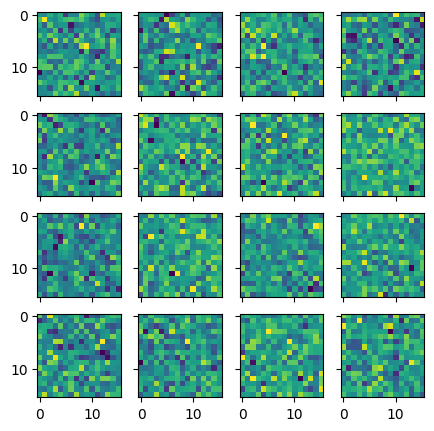

In [42]:
x, logq = apply_flow_to_prior(model['prior'], model['layers'], batch_size=16)

fig,axes = plt.subplots(4,4, figsize=(5,5), sharex=True, sharey=True)
for ax, x0 in zip(axes.ravel(),x):
    ax.imshow(grab(x0).squeeze().T, aspect='equal')
    ax.grid(False)

How can we tell if this is a good model for the target action? This is a hard question in general, but effective sample size (ESS) per configuration could be good metric for that which live in the range $[0,1]$ (lager is better). 

In [43]:
def compute_ess(logp, logq):
    logw = logp - logq
    log_ess = 2*torch.logsumexp(logw, dim=0) - torch.logsumexp(2*logw, dim=0)
    ess_per_cfg = torch.exp(log_ess) / len(logw)
    return ess_per_cfg

## **Train the model**

For convenience, the cell below instantiates the model and everything we need to train it. We'll work with very small lattices with $L=4$ so training goes quickly.

In [44]:
# Lattice Theory
L = 4
lattice_shape = (L,L)
M2 = -4.0
lam = 8.0
phi4_action = ScalarPhi4Action(M2=M2, lam=lam)

# Model
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

n_layers = 16
hidden_sizes = [8,8]
kernel_size = 3
layers = make_phi4_affine_layers(lattice_shape=lattice_shape, n_layers=n_layers, 
    hidden_sizes=hidden_sizes, kernel_size=kernel_size)
model = {'layers': layers, 'prior': prior}

# Training
base_lr = .001
optimizer = torch.optim.Adam(model['layers'].parameters(), lr=base_lr)

We need to optimize the coupling layers to match the model distribution $q(\phi)$ to the target one $p(\phi)$. To do this, we minimize a quantity known as the Kullback-Leibler (KL) divergence, which measures how close two distributions are. Training data drawn from $p$ can be scarce in simulations of lattice field theories, so we make use of the "reverse" KL divergence,
estimated using $N$ samples drawn from the model distribution ($\phi_i \sim q$) as
\begin{equation}
\widehat{D}_{KL}(q || p) = \frac{1}{N} \sum_{i=1}^N \left[ \log{q}(\phi_i) - \log{p}(\phi_i) \right] \quad \left( \phi_i \sim q \right).
\end{equation}

In [45]:
def calc_dkl(logp, logq):
    return (logq - logp).mean()

We use a "reverse KL self-training" protocol that consists of
  1. Drawing samples $\phi_i$ and density estimates $\log q(\phi_i)$ from the model
  2. Computing $\log p(\phi_i) \propto -S(\phi_i)$ on each sample
  3. Using $\log q$ and $\log p$ to compute the reverse KL divergence over the samples
  3. Using standard stochastic gradient descent methods (i.e. Adam) to iteratively update neural network weights
  
  
### **Exercise #3**
 These basic steps should look familiar from previous tutorial. Fill out the function below.

In [ ]:
def train_step(model, action, loss_fn, optimizer, metrics):
    layers, prior = model['layers'], model['prior']

    x, logq = # INSERT CODE HERE
    logp = # INSERT CODE HERE
    loss = # INSERT CODE HERE

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # log some metrics as we go
    metrics['loss'].append(grab(loss))
    metrics['logp'].append(grab(logp))
    metrics['logq'].append(grab(logq))
    metrics['ess'].append(grab( compute_ess(logp, logq) ))

In [50]:
# Answer
def train_step(model, action, loss_fn, optimizer, metrics):
    layers, prior = model['layers'], model['prior']

    x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size)
    logp = -action(x)
    loss = calc_dkl(logp, logq)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    metrics['loss'].append(grab(loss))
    metrics['logp'].append(grab(logp))
    metrics['logq'].append(grab(logq))
    metrics['ess'].append(grab( compute_ess(logp, logq) ))

At this moment we are ready to set hyperparameters for training 

In [47]:
N_era = 1
N_epoch = 200
batch_size = 256
print_freq = 50
plot_freq = 1

history = {
    'loss' : [],
    'logp' : [],
    'logq' : [],
    'ess' : []
}

and run training

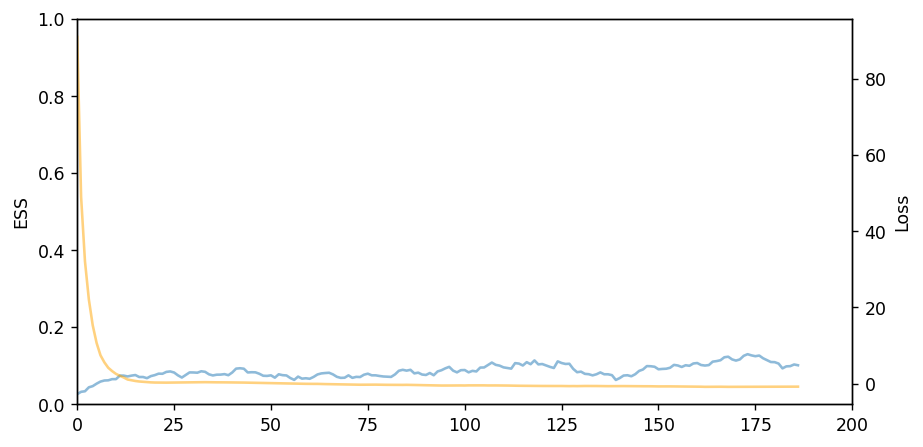

== Era 0 | Epoch 0 metrics ==
	loss 444.35
	logp -464.305
	logq -19.9549
	ess 0.00411359
== Era 0 | Epoch 50 metrics ==
	loss 9.92415
	logp -14.4936
	logq -4.56941
	ess 0.0662987
== Era 0 | Epoch 100 metrics ==
	loss -0.182728
	logp -2.31725
	logq -2.49997
	ess 0.0781593
== Era 0 | Epoch 150 metrics ==
	loss -0.589576
	logp -3.13287
	logq -3.72244
	ess 0.0904022


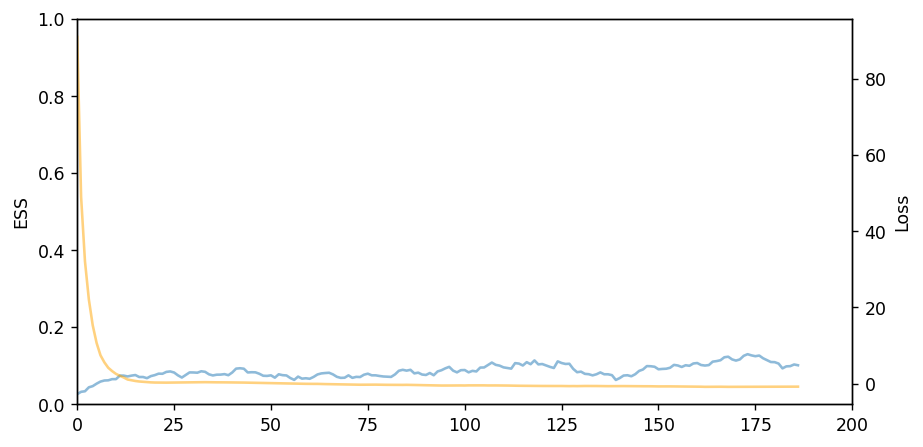

In [51]:

[plt.close(plt.figure(fignum)) for fignum in plt.get_fignums()] # close all existing figures
live_plot = init_live_plot()

for era in range(N_era):
    for epoch in range(N_epoch):
        train_step(model, phi4_action, calc_dkl, optimizer, history)

        if epoch % print_freq == 0:
            print_metrics(history, avg_last_N_epochs=print_freq)

        if epoch % plot_freq == 0:
            update_plots(history, **live_plot)

### **Exercise #4 **

The cell below draws a batch of configurations from the sample, computes $S(\phi)$ and $S_{\text{eff}} \equiv - \log q(\phi)$ on each one, then makes a 2d histogram comparing these quantities.

**Discuss:** What would this look like for a perfect model? How does your model compare?

slope 1 linear regression S = S_eff + -0.8343


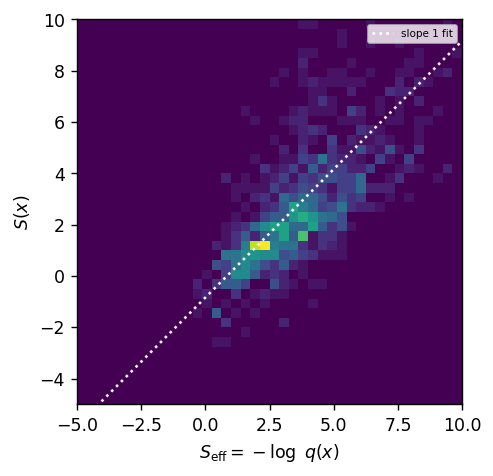

In [52]:
with torch.no_grad():
  phi, logq = apply_flow_to_prior(model['prior'], model['layers'], batch_size=1024)
S_eff = -grab(logq)
S = grab(phi4_action(phi))
fit_b = np.mean(S) - np.mean(S_eff)
print(f'slope 1 linear regression S = S_eff + {fit_b:.4f}')
fig, ax = plt.subplots(1,1, dpi=125, figsize=(4,4))
ax.hist2d(S_eff, S, bins=40, range=[[-5, 10], [-5, 10]])
ax.set_xlabel(r'$S_{\mathrm{eff}} = -\log~q(x)$')
ax.set_ylabel(r'$S(x)$')
ax.set_aspect('equal')
xs = np.linspace(-5, 10, num=4, endpoint=True)
ax.plot(xs, xs + fit_b, ':', color='w', label='slope 1 fit')
plt.legend(prop={'size': 6})
plt.show()

## **Independence Metropolis **

To produce **unbiased** estimates of observables, we can use model samples as proposals in  the Metropolis-Hastings (MH) algorithm.

Generally, the MH algorithm consists of proposing an updated configuration $\phi'$ to the current configuration $\phi^{i-1}$ and stochastically accepting or rejecting the configuration with probability
\begin{equation}
p_{\mathrm{accept}}(\phi'|\phi^{i-1}) = \min \left(
    1,\;
    \frac{T(\phi' \rightarrow \phi^{i-1})}{T(\phi^{i-1} \rightarrow \phi')}
    \frac{p(\phi')}{p(\phi^{i-1})}
\right).
\end{equation}
Here $T(x \rightarrow y)$ is the probability of proposing config $y$ starting from $x$. If accepted, we define the next configuration in the chain to be $\phi^i = \phi'$; if rejected, the last configuration is repeated and $\phi^i = \phi^{i-1}$.

The convenience function generates draws batches of samples from a flow model, and yields them (along with $\log p$ and $\log q$) one at a time. We use each sample as a proposal in MH.

In [56]:
def serial_sample_generator(model, action, batch_size, N_samples):
    layers, prior = model['layers'], model['prior']
    layers.eval()
    x, logq, logp = None, None, None
    with torch.no_grad():
      for i in range(N_samples):
          batch_i = i % batch_size
          if batch_i == 0:
              # we're out of samples to propose, generate a new batch
              x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size)
              logp = -action(x)
          yield x[batch_i], logq[batch_i], logp[batch_i]

### **Exercise #5 :** 
Compute $p_{\mathrm{accept}}$ for independent flow proposals (known as independence Metropolis). \[Hint: if $p(\phi') = q(\phi')$, all proposals are accepted, and the chain is a sequence of totally uncorrelated samples.\]

Code your result up in the function below.

In [ ]:
def make_mcmc_ensemble(model, action, batch_size, N_samples):
    history = {
        'x' : [],
        'logq' : [],
        'logp' : [],
        'accepted' : []
    }

    # build Markov chain
    sample_gen = serial_sample_generator(model, action, batch_size, N_samples)
    for new_x, new_logq, new_logp in sample_gen:
        if len(history['logp']) == 0:
            # always accept first proposal, Markov chain must start somewhere
            accepted = True
        else: 
            last_logp = history['logp'][-1]
            last_logq = history['logq'][-1]
            
            p_accept = # TODO
            
            draw = torch.rand(1) # ~ [0,1]
            if draw < p_accept:
                accepted = True
            else:
                accepted = False
                new_x = history['x'][-1]
                new_logp = last_logp
                new_logq = last_logq
        # Update Markov chain
        history['logp'].append(new_logp)
        history['logq'].append(new_logq)
        history['x'].append(new_x)
        history['accepted'].append(accepted)
    return history

In [57]:
#Answer
def make_mcmc_ensemble(model, action, batch_size, N_samples):
    history = {
        'x' : [],
        'logq' : [],
        'logp' : [],
        'accepted' : []
    }

    # build Markov chain
    sample_gen = serial_sample_generator(model, action, batch_size, N_samples)
    for new_x, new_logq, new_logp in sample_gen:
        if len(history['logp']) == 0:
            # always accept first proposal, Markov chain must start somewhere
            accepted = True
        else: 
            last_logp = history['logp'][-1]
            last_logq = history['logq'][-1]
            
            p_accept = torch.exp((new_logp - new_logq) - (last_logp - last_logq))
            p_accept = min(1, p_accept)
            
            draw = torch.rand(1) # ~ [0,1]
            if draw < p_accept:
                accepted = True
            else:
                accepted = False
                new_x = history['x'][-1]
                new_logp = last_logp
                new_logq = last_logq
        # Update Markov chain
        history['logp'].append(new_logp)
        history['logq'].append(new_logq)
        history['x'].append(new_x)
        history['accepted'].append(accepted)
    return history

Now we can calculate the Independence Metropolis acceptance rate, which is another metric of the quality of our model like the ESS.

In [58]:
ensemble_size = 81920
phi4_ens = make_mcmc_ensemble(model, phi4_action, 64, ensemble_size)
print("Accept rate:", np.mean(phi4_ens['accepted']))

Accept rate: 0.24234619140625


It could be interesting to compare action distribution for model samples and MCMC-corrected unbiased one.

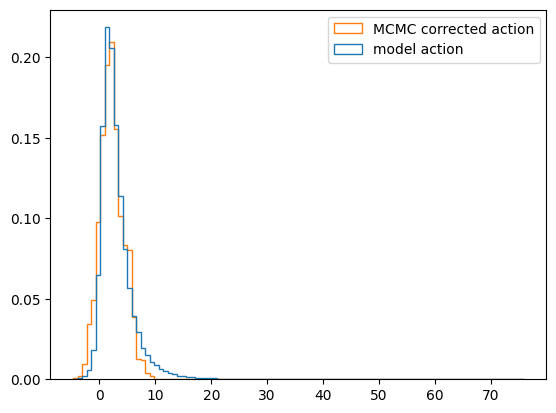

In [59]:
with torch.no_grad():
  phi, _ = apply_flow_to_prior(model['prior'], model['layers'], batch_size=ensemble_size)
phi_unbiased = torch.stack(phi4_ens['x'])

S, S_unbiased = map(lambda x: phi4_action(x).cpu(), [phi, phi_unbiased])
plt.hist(torch.stack([S, S_unbiased]), label=['model action', 'MCMC corrected action'], bins=100, density=1, histtype='step');
plt.legend();

Note from Phil: I would really like this to lead to a physical observable that is interpretable. Even if its some measurement in phi4 theory, that is fine. However, I really think we weant to have some meaningful physics at teh end of this. 